In [4]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Things to know about the dataset

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

## 1. Import necessary packages

For this exercise we need

* pandas
* train_test_split
* LogisticRegression
* pyplot from matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 2. Load and prepare the dataset

* Load the dataset into a dataframe named df_data (this step is done for you).
* Drop the name column. This column is not a feature required by the model.
* Create a dataframe named X containing all the columns except the status.
* Create a dataframe named y containing the status.

In [23]:
df = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<IPython.core.display.Javascript object>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<IPython.core.display.Javascript object>

In [10]:
df = df.drop(["name"], axis=1)
X = df.drop(["status"], axis=1)
y = df["status"]

<IPython.core.display.Javascript object>

The dataframes has been split up into the 'X', indepent vairables or values we are using to predict our target, and 'y', the dependent variable target, or classification the model is being trained to predict.

 ## 3. Split the dataset into a training set and a test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

## 4. Create the model

1. Instantiate a Logistic Regression classifier with a lbfgs solver and penalty set to 'none'.
* Fit the classifier to the data

_If the algorithm fails to converge, what change can you make to fix that?_

In [12]:
lr = LogisticRegression(solver="lbfgs", penalty="none", max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

<IPython.core.display.Javascript object>

## 5. Calculate Accuracy

Calculate and print the accuracy of the model on the test data

In [25]:
lr_score = lr.score(X_test, y_test)

print("Accuracy of Logistic Regression without regularization: {}".format(lr_score))

Accuracy of Logistic Regression without regularization: 0.8775510204081632


<IPython.core.display.Javascript object>

## 6. L2 Regularization

Train a model with L2 regularization to compare with the the model just made

In [26]:
lr = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=1000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Accuracy of Logistic Regression with L2 regularization: {}".format(lr_score))

Accuracy of Logistic Regression with L2 regularization: 0.8979591836734694


<IPython.core.display.Javascript object>

## 7. Choose the C parameter

Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

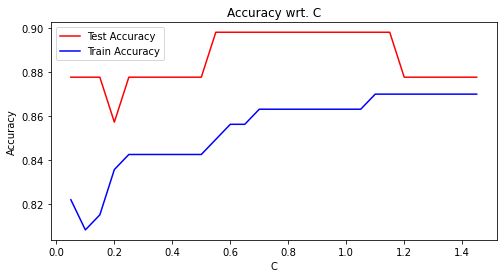

<IPython.core.display.Javascript object>

In [27]:
c_params = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_params:
    lr = LogisticRegression(solver="lbfgs", penalty="l2", C=c, max_iter=10000)
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(c_params, test_accuracy, "-r", label="Test Accuracy")
ax.plot(c_params, train_accuracy, "-b", label="Train Accuracy")
ax.set(xlabel="C", ylabel="Accuracy")
ax.set_title("Accuracy wrt. C")
ax.legend()
plt.show()

As shown on the above graph, the best accuracy occurs when 'C' is about 1.2 or 1.3.